In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np
from keras import models


C:\Users\sagor\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
IMG_HEIGHT=48 
IMG_WIDTH = 48
batch_size = 128

train_data_dir='Train'
validation_data_dir='Test'

In [3]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)


Found 6300 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


In [5]:
#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['angry','disgust', 'fear', 'happy','neutral','sad','surprise']

img, label = train_generator.__next__()

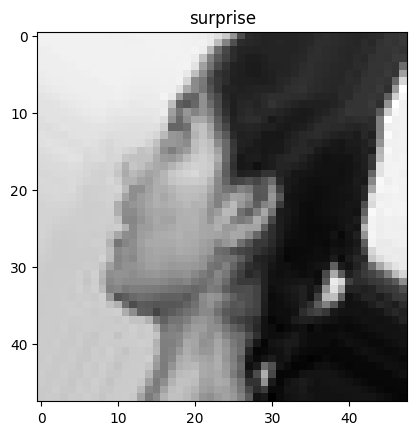

In [7]:
import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [8]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [10]:
train_path = "Train"
test_path = "Test"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

print(num_test_imgs,num_train_imgs)    

700 6300


In [9]:
epochs=100

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size)

model.save('emotion_detection_model_100epochs.h5')

Epoch 1/100
49/49 [==============================] - 98s 2s/step - loss: 1.8792 - accuracy: 0.2140 - val_loss: 1.9031 - val_accuracy: 0.2094
Epoch 2/100
49/49 [==============================] - 74s 1s/step - loss: 1.6693 - accuracy: 0.3249 - val_loss: 1.9028 - val_accuracy: 0.2703
Epoch 3/100
49/49 [==============================] - 70s 1s/step - loss: 1.5758 - accuracy: 0.3757 - val_loss: 1.9202 - val_accuracy: 0.2750
Epoch 4/100
49/49 [==============================] - 72s 1s/step - loss: 1.5123 - accuracy: 0.4029 - val_loss: 1.7450 - val_accuracy: 0.3266
Epoch 5/100
49/49 [==============================] - 80s 2s/step - loss: 1.4434 - accuracy: 0.4320 - val_loss: 1.6743 - val_accuracy: 0.3531
Epoch 6/100
49/49 [==============================] - 81s 2s/step - loss: 1.3708 - accuracy: 0.4671 - val_loss: 1.5495 - val_accuracy: 0.3844
Epoch 7/100
49/49 [==============================] - 81s 2s/step - loss: 1.3015 - accuracy: 0.5057 - val_loss: 1.5565 - val_accuracy: 0.3531
Epoch 8/100
4

In [11]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [19]:
#Test the model
from keras.models import load_model
my_model = load_model('emotion_detection_model_100epochs.h5', compile=False)

#Generate a batch of images
test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

2/2 [==============================] - 0s 73ms/step
Accuracy =  0.9


In [20]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
print(cm)


[[ 6  0  1  0  1  0  0]
 [ 0  8  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  8  1  0  0]
 [ 2  0  0  0  6  1  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0 10]]


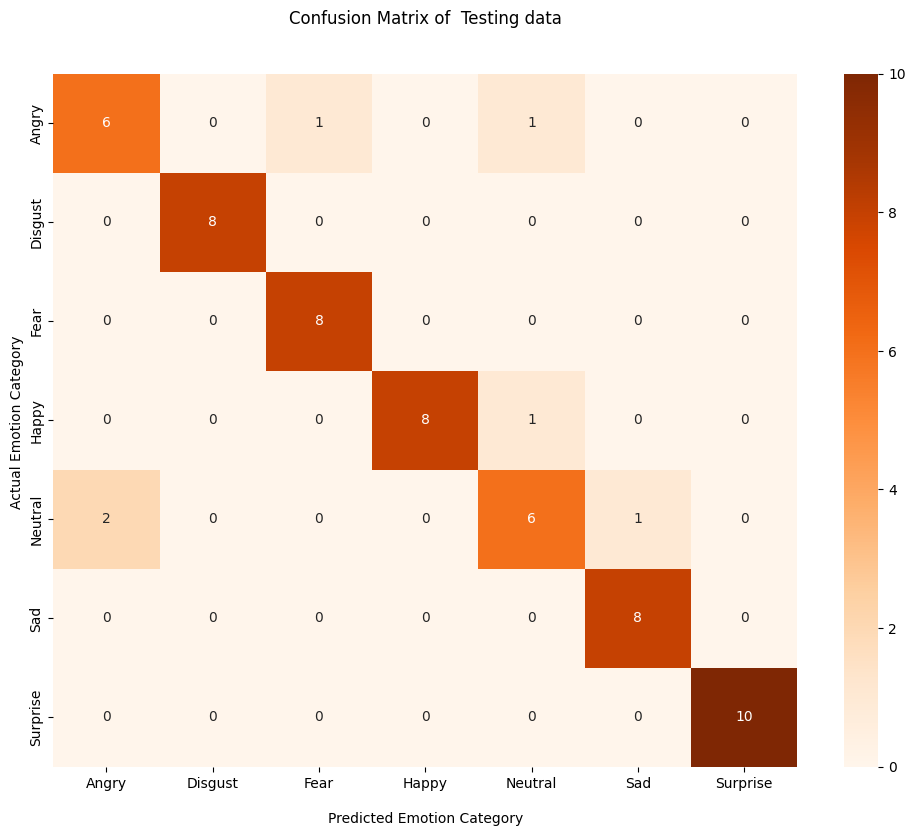

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,9)) 
# ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax =sns.heatmap(cm, annot=True,fmt="d",cmap='Oranges')
ax.set_title('Confusion Matrix of  Testing data\n\n');
ax.set_xlabel('\nPredicted Emotion Category')
ax.set_ylabel('Actual Emotion Category ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise'])
ax.yaxis.set_ticklabels(['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise'])
## Display the visualization of the Confusion Matrix.
plt.show()

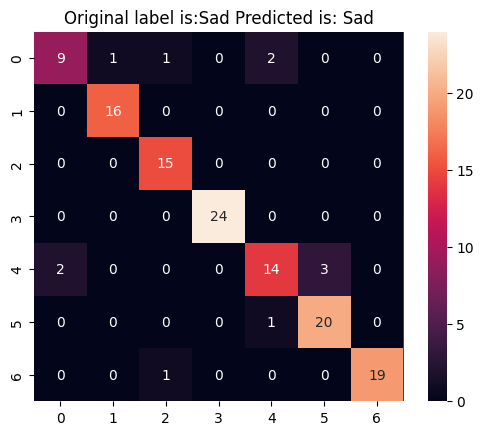

In [19]:
import seaborn as sns
sns.heatmap(cm, annot=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='Oranges')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

In [14]:
# from PIL import Image
# import os, sys
# import glob

# root_dir = r"C:\Users\sagor\OneDrive\Desktop\Thesis\newModel\XData\Train\angry"


# for filename in glob.iglob(root_dir + '/*.jpg', recursive=True):
#     print(filename)
#     im = Image.open(filename)

#     imResize = im.resize((48,48), Image.ANTIALIAS)
#     imResize.save(filename , 'JPEG', quality=90)